# Retrieving Bird Occurrence Data from the TERN Ecosystem API

In this tutorial, we will walk through the process of connecting to the TERN Ecosystem API to retrieve specific data related to ecosystem processes. By the end of this tutorial, you'll understand how to establish a connection, define a query, and process the returned data.


### Importing Necessary Libraries

To connect to the TERN API and handle the data, we'll need two libraries:

- `http.client`: Helps establish the connection and make the request.
- `json`: Assists in formatting our query into JSON format, which is required by the API.


In [1]:
import http.client
import json


### Setting Up the Connection

To retrieve data, we first need to establish a connection to the API's server. In this case, we're connecting to TERN's test server at "ecoplots-test.tern.org.au".


In [2]:
conn = http.client.HTTPSConnection("ecoplots-test.tern.org.au")


### Defining the Query

To instruct the API on what data we're interested in, we define a query. This query specifies:

- The dataset we're interested in (`tern-ecosystem-processes`).
- The feature type, which is a specific TERN classification.
- The site ID, representing a particular location or site.


In [3]:
payload = json.dumps({
  "query": {
    "dataset": [
      "http://linked.data.gov.au/dataset/tern-ecosystem-processes"
    ],
    "feature_type": [
      "http://linked.data.gov.au/def/tern-cv/0c30e871-63ae-4f84-a37c-ef6e7ce02928"
    ],
    "site_id": [
      "https://w3id.org/tern/resources/d90ffc82-61fa-40ff-83cf-e0f1072f2540"
    ]
  }
})


### Defining Headers
For our request to be successfully processed by the server, we need to define certain headers. The headers include the necessary API key for authorisation and specify the content type as JSON.


In [4]:
headers = {
  'X-Api-Key': 'api_key',
  'Content-Type': 'application/json'
}


### Sending the API Request

Now that we have set up our connection details, query, and headers (including the API key), we can proceed to send our request to the TERN API. We'll use the `request` method of our connection object to do this.


In [5]:
# Send the POST request to the TERN API
conn.request("POST", "/api/v1.0/data/tern-ecosystem-processes?dformat=csv", payload, headers)


### Processing the Response

Once we send our request, the TERN API will process it and send back a response. We need to capture this response and process it to extract the data we're interested in.


In [6]:
# Capture the response from the API
res = conn.getresponse()

# Read the data from the response
data = res.read()


### Displaying the Data

Let's take a look at the data we received from the TERN API. We'll decode it from its byte format and print it out to view its content.


In [7]:
# Decode the data and print it
decoded_data = data.decode("utf-8")
print(decoded_data)


datasetTitle,projectTitle,siteName,parentSiteName,latitude_Degree,longitude_Degree,topParentSiteName,siteVisitName,siteVisitStartDate,siteVisitEndDate,featureType,featureId,parentFeatureId,scientificName,scientificName,scientificNameResultTime,scientificNameMethod,individualCount_number,individualCountResultTime,individualCountMethod
TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",N/A,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosystem-processes/dataset-bird_survey/site_visit_id-daintree_rainforest__cape_tribulation_20141023-row_index-0,https://w3id.org/tern/resources/d90ffc82-61fa-40ff-83cf-e0f1072f2540,Coracina lineata,Coracina lineata,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771-0b84-494f-8cf9-8ecf6f41fc96,1,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771-0b84-494f-8cf9-8ecf6f41fc96
TERN Ecosystem

### Data Import and Cleanup

Now that we have retrieved data from the API, the next step is to process this data into a structured format suitable for analysis. This will involve importing the data into a DataFrame and cleaning it up.


In [8]:
import pandas as pd
from io import StringIO

# Convert the API response string to a DataFrame
df = pd.read_csv(StringIO(data.decode("utf-8")))

# Display the first few rows of the dataframe
df.head()


,datasetTitle,projectTitle,siteName,parentSiteName,latitude_Degree,longitude_Degree,topParentSiteName,siteVisitName,siteVisitStartDate,siteVisitEndDate,featureType,featureId,parentFeatureId,scientificName,scientificName.1,scientificNameResultTime,scientificNameMethod,individualCount_number,individualCountResultTime,individualCountMethod
0,TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",NaN,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosyst...,https://w3id.org/tern/resources/d90ffc82-61fa-...,Coracina lineata,Coracina lineata,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...,1,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...
1,TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",NaN,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosyst...,https://w3id.org/tern/resources/d90ffc82-61fa-...,Melloria quoyi,Melloria quoyi,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...,3,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...
2,TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",NaN,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosyst...,https://w3id.org/tern/resources/d90ffc82-61fa-...,Pandion cristatus,Pandion cristatus,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...,1,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...
3,TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",NaN,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosyst...,https://w3id.org/tern/resources/d90ffc82-61fa-...,Chalcophaps indica,Chalcophaps indica,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...,1,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...
4,TERN Ecosystem Processes,Bird-survey,"Daintree Rainforest, Cape Tribulation",NaN,-16.1056,145.378,"Daintree Rainforest, Cape Tribulation",20141023,2014-10-23T00:00:00,2014-10-25T00:00:00,bird occurrence,http://linked.data.gov.au/dataset/tern-ecosyst...,https://w3id.org/tern/resources/d90ffc82-61fa-...,Gerygone palpebrosa,Gerygone palpebrosa,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...,1,2014-10-23T00:00:00,http://linked.data.gov.au/def/tern-cv/16f25771...


### Exploratory Data Analysis (EDA)

Before diving deep into advanced analyses, it's often a good idea to get a sense of the data we're working with. We'll start by visualising the distributions of certain columns. 

Let's see which bird species are the most commonly sighted in our dataset.


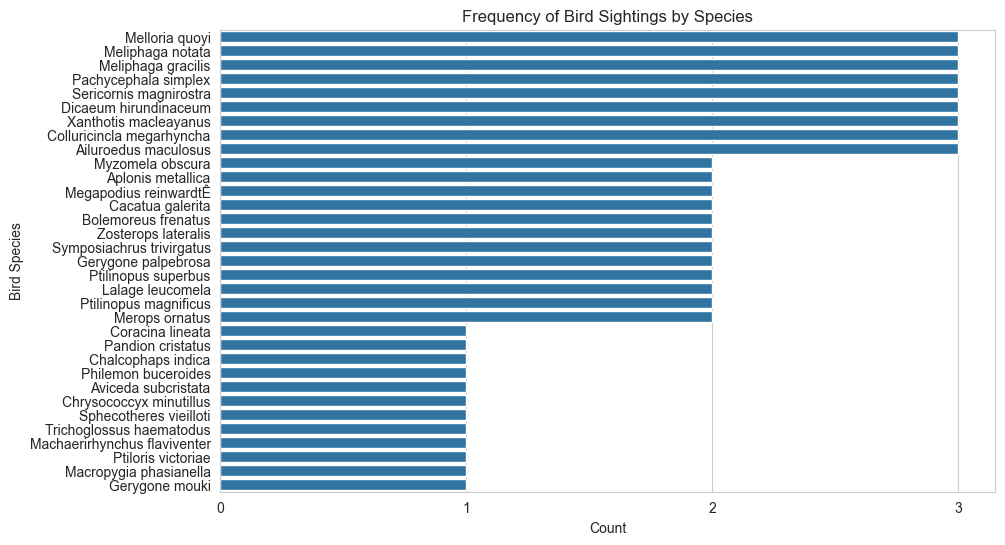

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='scientificName', order=df['scientificName'].value_counts().index)
plt.title('Frequency of Bird Sightings by Species')
plt.xlabel('Count')
plt.ylabel('Bird Species')

# Set x-axis ticks to integers
plt.xticks(range(0, max(df['scientificName'].value_counts()) + 1, 1))

plt.show()


### Bird Species Diversity

To evaluate the diversity of bird species within our dataset, we can compute the Shannon Diversity Index. This metric considers both the number of species and the evenness of the species' proportions.


In [20]:
import numpy as np

# Calculate Shannon Diversity Index
species_counts = df['scientificName'].value_counts()
species_proportions = species_counts / species_counts.sum()
shannon_diversity_index = -np.sum(species_proportions * np.log(species_proportions))

print(f"Shannon Diversity Index: {shannon_diversity_index:.4f}")


Shannon Diversity Index: 3.4082


### Pie Chart of Top 5 Bird Species

Let's visualise the proportion of the top 5 most commonly sighted bird species in our dataset using a pie chart.


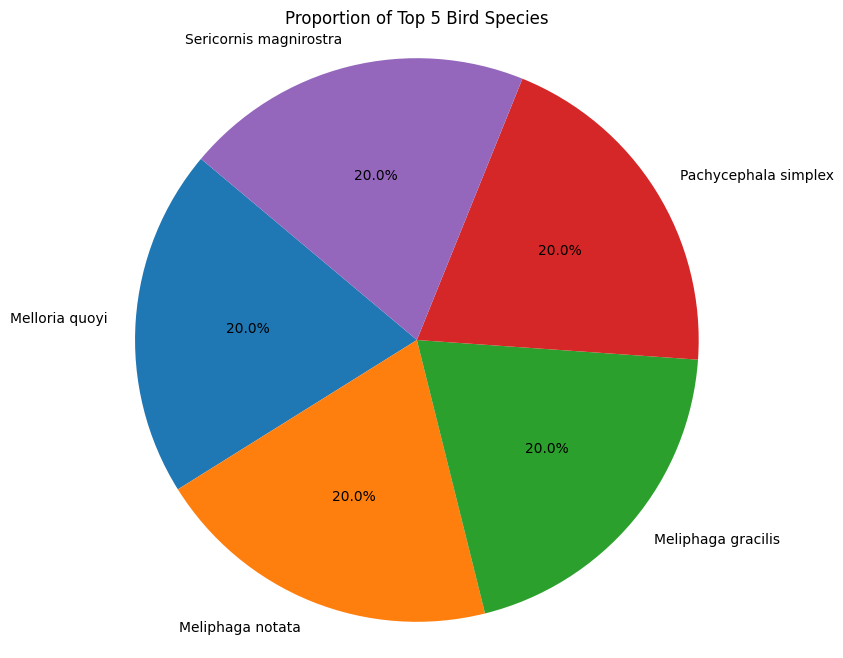

In [17]:
# Get the top 5 bird species and their counts
top_species = df['scientificName'].value_counts().head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_species, labels=top_species.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 5 Bird Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Conclusion

In this tutorial, we've covered the basics of bird occurrence data analysis using the TERN Ecosystem API. We explored data retrieval, preprocessing, and visualisation steps. While this tutorial provides a fundamental understanding, there are numerous avenues for further exploration and in-depth analysis. Researchers and enthusiasts can dive deeper into this dataset to uncover ecological insights and conduct species-specific studies. The dataset offers ample opportunities for expanding our knowledge of avian biodiversity through data-driven approaches.
